# Bipartite graphs i mètriques

En aquesta secció estudiarem els bipartit graphs i les corresponent mètriques per la wikipedia castellana i l'alemana.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize']=(12.0,6.0)

Populating the interactive namespace from numpy and matplotlib


In [7]:
#Importem les dades al dataframe Wikipedia espanyol Complet i dataframe Wikipedia alemany Complet

WesC=pd.read_csv('WesC_clean.csv',na_values=':',usecols=["Article","Autor","Data"],nrows=20000)
WdeC=pd.read_csv('WesC_clean_de.csv',na_values=':',usecols=["Article","Autor","Data"],nrows=20000)


In [3]:
#importar una mostra aleatòria de tota la base
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

Wes=WesC.sample(1000)
Wde=WdeC.sample(1000)

### AQUEST PAS ÉS CRÍTIC PER TOTA LA RESTA DEL NOTEBOOK. TREBALLEM SEMPRE AMB LA MOSTRA ORDENADA.
### NO ÉS COHERENT PERQUÈ LA DATA PODRIA NO SER UN VALOR ÚNIC.

#recordar que si no assignem la funció ordenada, no la guarda.
Wes=Wes.sort_values(by='Data')
Wde=Wde.sort_values(by='Data')


In [4]:
# Modifiquem la columna Article afegint-hi Art_
Wes['Article']= 'Art_es_' + Wes['Article'].astype(str)
Wes.head();
Wde['Article']= 'Art_de_' + Wde['Article'].astype(str)
# problema pq després ordena malament.
# Si volem incorporar Aut_ davant de l'Autor:
#Wes['Autor']='Au_' + Wes['Autor'].astype(str)

In [8]:
#Creem la edgelist
GBWes_edgelist = Wes[['Autor','Article']].apply(tuple, axis =1)

In [9]:
#Creem la edgelist
GBWde_edgelist = Wde[['Autor','Article']].apply(tuple, axis =1)

In [ ]:
### conservem la nomenclatura de networkx
# Articles = TOP_NODES
# Autors   = BOTTOM_NODES

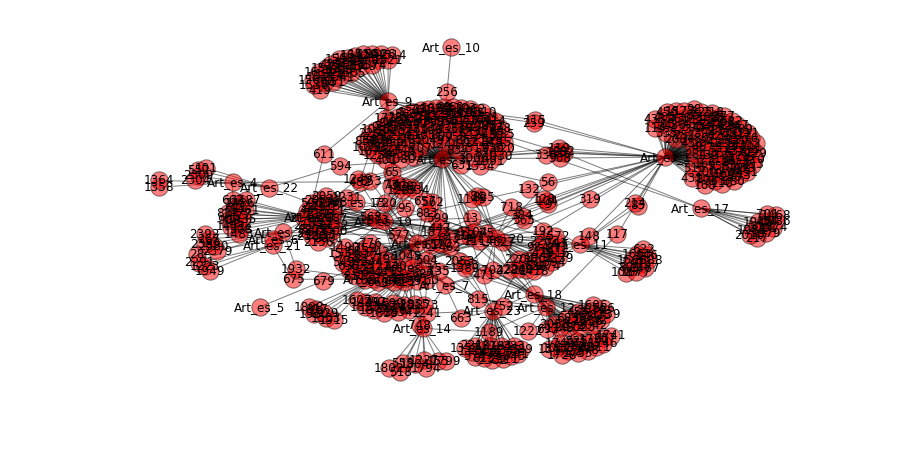

In [10]:
#Creem el Graph de la Wikipedia Espanyol GBWes, amb estructura bipartida
GBWes=nx.Graph()
#Aut_es, Art_es = bipartite.sets(GBWes)


GBWes.add_nodes_from(Wes['Autor'], bipartite=0)
GBWes.add_nodes_from(Wes['Article'], bipartite=1)
GBWes.add_edges_from  (GBWes_edgelist) #([('d','a'), ('d','b'), ('e','b'), ('e','c'), ('e','c'), ('f','c'), ('g','a')])
nx.draw(GBWes, alpha=0.5, with_labels = True, node_color='r')  
plt.show()


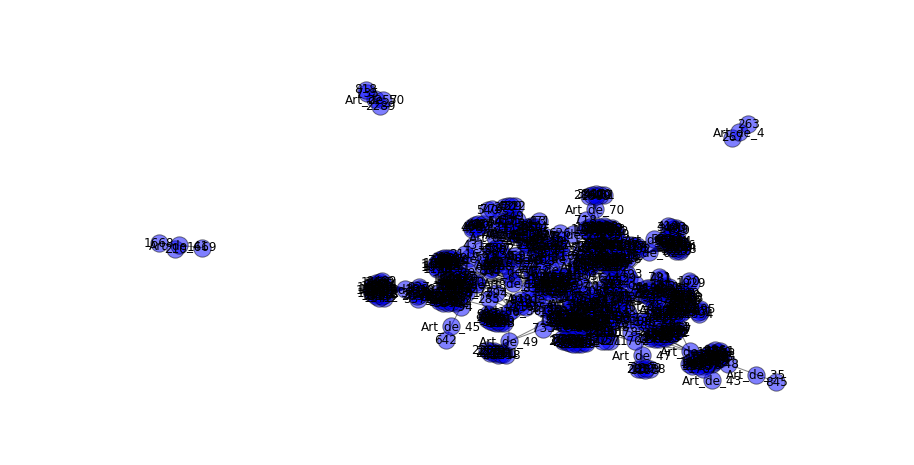

In [12]:
#Creem el Graph Bipartit de la Wikipedia alemany GBWde, amb estructura bipartida
GBWde=nx.Graph()
#Aut_de, Art_de = nx.bipartite.sets(GBWes)

GBWde.add_nodes_from(Wde['Autor'], bipartite=0)
GBWde.add_nodes_from(Wde['Article'], bipartite=1)
GBWde.add_edges_from  (GBWde_edgelist) #([('d','a'), ('d','b'), ('e','b'), ('e','c'), ('e','c'), ('f','c'), ('g','a')])
nx.draw(GBWde, alpha=0.5, with_labels = True, node_color='b')  
plt.show()


In [13]:
nx.is_connected(GBWes)

True

In [14]:
nx.is_connected(GBWde)

False

In [23]:
bottom_nodes_es, top_nodes_es = nx.bipartite.sets(GBWes)

In [25]:
bottom_nodes_de, top_nodes_de = nx.bipartite.sets(GBWde)

In [24]:
top_nodes_es = set(n for n,d in GBWes.nodes(data=True) if d['bipartite']==1)
bottom_nodes_es = set(GBWes) - top_nodes_es

In [26]:
top_nodes_de = set(n for n,d in GBWde.nodes(data=True) if d['bipartite']==1)
bottom_nodes_de = set(GBWde) - top_nodes_de

In [27]:
# Si necessitem consultar les particions dels graphs
nx.bipartite.sets(GBWes);
nx.bipartite.sets(GBWde);

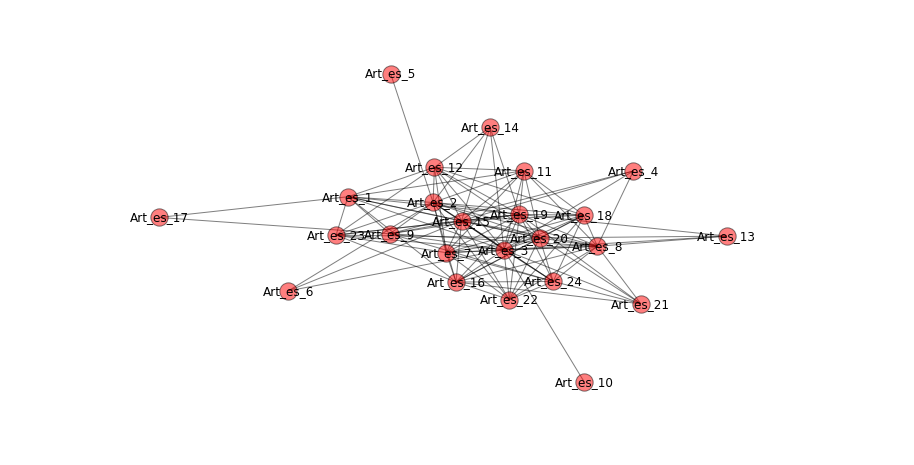

In [28]:
#Projecció de la Wikipedia espanyol en top_nodes. Si dos articles comparteixen com a mínim un Autor
# els articles queden connectats
nx.draw(nx.projected_graph(GBWes, top_nodes_es), alpha = 0.5, with_labels=True, node_color='r')
plt.show()

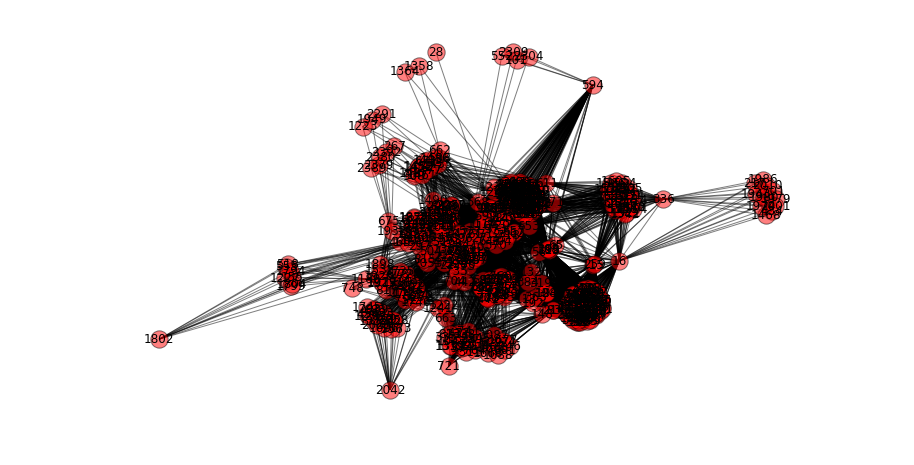

In [29]:
#Projecció de la Wikipedia espanyol en bottom_nodes. Si dos autors comparteixen com a mínim un Article
# els autors queden connectats
nx.draw(nx.projected_graph(GBWes, bottom_nodes_es), alpha = 0.5, with_labels=True, node_color='r')
plt.show()

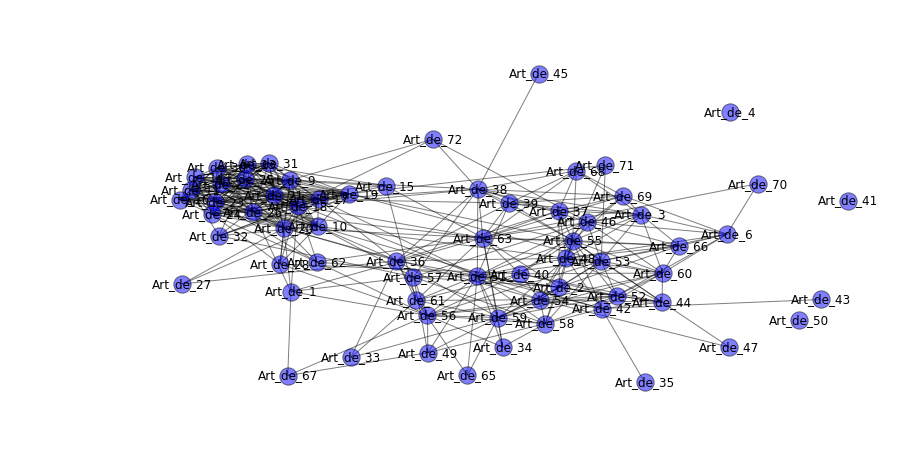

In [31]:
#Projecció de la Wikipedia alemany en top_nodes. Si dos articles comparteixen com a mínim un Autor
# els articles queden connectats
nx.draw(nx.projected_graph(GBWde, top_nodes_de), alpha = 0.5, with_labels=True, node_color='b')
plt.show()

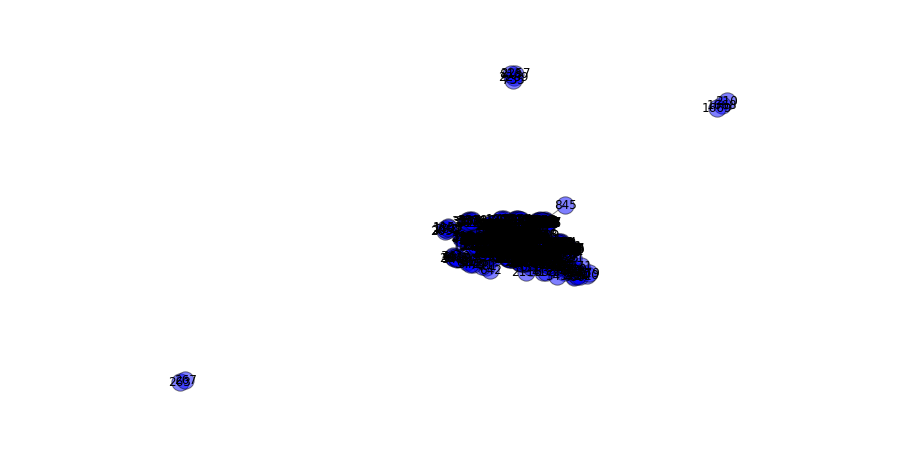

In [32]:
#Projecció de la Wikipedia alemany en top_nodes. Si dos articles comparteixen com a mínim un Autor
# els articles queden connectats
nx.draw(nx.projected_graph(GBWde, bottom_nodes_de), alpha = 0.5, with_labels=True, node_color='b')
plt.show()

In [33]:
nx.bipartite.color(GBWes);

In [34]:
nx.edges(nx.projected_graph(GBWes,top_nodes));


In [55]:
a=nx.bipartite.density(GBWes,bottom_nodes_es)
b = nx.bipartite.density(GBWes,top_nodes_es)
c=nx.bipartite.density(GBWde,bottom_nodes_de)
d = nx.bipartite.density(GBWde,top_nodes_de)
print 'densitat bottom nodes espanyol:', a
print 'densitat top nodes espanyol:', b
print 'densitat bottom nodes alemany:', c
print 'densitat top nodes alemany:', d

densitat bottom nodes espanyol: 0.0546276965901
densitat top nodes espanyol: 0.0546276965901
densitat bottom nodes alemany: 0.0203649397198
densitat top nodes alemany: 0.0203649397198


In [56]:
nx.bipartite.degrees(GBWes,bottom_nodes_es);

In [60]:
#nx.projected_graph(GBWes, bottom_nodes).order()
e = nx.projected_graph(GBWes, top_nodes_es).size()
f = nx.projected_graph(GBWes, bottom_nodes_es).size()
g = nx.projected_graph(GBWde, top_nodes_de).size()
h = nx.projected_graph(GBWde, bottom_nodes_de).size()
print 'mida bottom nodes espanyol:', e
print 'mida top nodes espanyol:', f
print 'mida bottom nodes alemany:', g
print 'mida top nodes alemany:', h

 mida bottom nodes espanyol: 121
mida top nodes espanyol: 18804
mida bottom nodes alemany: 383
mida top nodes alemany: 7476


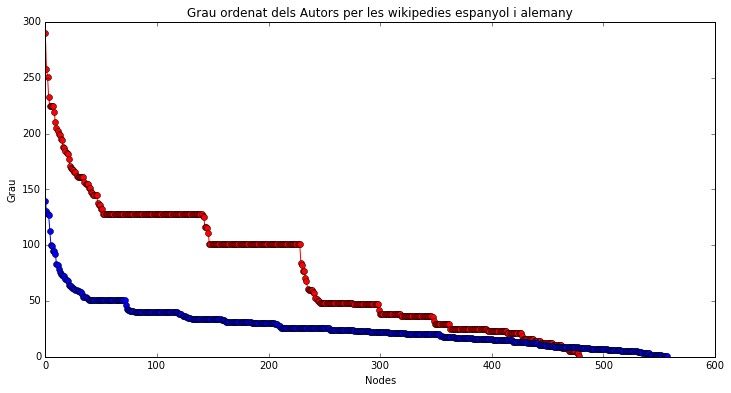

In [64]:
bottom_degree_sequence_es= sorted(nx.projected_graph(GBWes, bottom_nodes_es).degree().values() ,reverse=True)  # degree sequence of all nodes
#top_degree_sequence_es= sorted(nx.projected_graph(GBWes, top_nodes_es).degree().values() ,reverse=True)  # degree sequence of all nodes
bottom_degree_sequence_de= sorted(nx.projected_graph(GBWde, bottom_nodes_de).degree().values() ,reverse=True)  # degree sequence of all nodes
#top_degree_sequence_de= sorted(nx.projected_graph(GBWde, top_nodes_de).degree().values() ,reverse=True)  # degree sequence of all nodes

plt.plot(bottom_degree_sequence_es, 'r-', marker='o')

plt.plot(bottom_degree_sequence_de, 'b-', marker='o')

plt.xlabel('Nodes')
plt.ylabel('Grau')
plt.title('Grau ordenat dels Autors per les wikipedies espanyol i alemany')

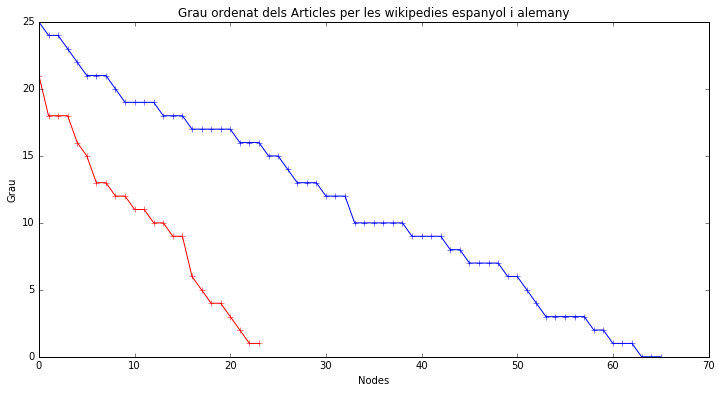

In [63]:

top_degree_sequence_es= sorted(nx.projected_graph(GBWes, top_nodes_es).degree().values() ,reverse=True)  # degree sequence of all nodes

top_degree_sequence_de= sorted(nx.projected_graph(GBWde, top_nodes_de).degree().values() ,reverse=True)  # degree sequence of all nodes


plt.plot(top_degree_sequence_es, 'r-', marker='+')

plt.plot(top_degree_sequence_de, 'b-', marker='+')
plt.xlabel('Nodes')
plt.ylabel('Grau')
plt.title('Grau ordenat dels Articles per les wikipedies espanyol i alemany')

In [66]:
# número de components connectats
i= nx.number_connected_components(nx.projected_graph(GBWes, bottom_nodes_es))
j= nx.number_connected_components(nx.projected_graph(GBWes, top_nodes_es))
k= nx.number_connected_components(nx.projected_graph(GBWde, bottom_nodes_de))
l= nx.number_connected_components(nx.projected_graph(GBWde, top_nodes_de))

print 'numero de components connectats en Articles espanyol:', i
print 'numero de components connectats en Autors espanyol::', j
print 'numero de components connectats en Articles alemany:', k
print 'numero de components connectats en Autors alemany:', l

numero de components connectats en Articles espanyol: 1
numero de components connectats en Autors espanyol:: 1
numero de components connectats en Articles alemany: 4
numero de components connectats en Autors alemany: 4


In [70]:
#mida dels components
GBWes_bottom_es = nx.connected_components(nx.projected_graph(GBWes, top_nodes_es))
print 'numero Articles connectats Wikipedia espanyol:',[len(c) for c in GBWes_bottom_es]

GBWes_bottom_es = nx.connected_components(nx.projected_graph(GBWes, bottom_nodes_es))
print 'numero Autors connectats Wikipedia espanyol:',[len(c) for c in GBWes_bottom_es]

GBWde_bottom_de = nx.connected_components(nx.projected_graph(GBWde, top_nodes_de))
print 'numero Articles connectats Wikipedia alemany:',[len(c) for c in GBWde_bottom_de]

GBWde_bottom_de = nx.connected_components(nx.projected_graph(GBWde, bottom_nodes_de))
print 'numero Autors connectats Wikipedia espanyol:',[len(c) for c in GBWde_bottom_de]

numero Articles connectats Wikipedia espanyol: [24]
numero Autors connectats Wikipedia espanyol: [479]
numero Articles connectats Wikipedia alemany: [63, 1, 1, 1]
numero Autors connectats Wikipedia espanyol: [549, 4, 3, 2]


### Degree

In [72]:
degree_Wes_bottom = nx.degree_centrality(nx.projected_graph(GBWes, bottom_nodes_es))
sorted((degree_Wes_bottom).items(), key=lambda x: x[1],reverse = True)[:10]

[(577, 0.606694560669456),
 (643, 0.5397489539748953),
 (56, 0.5251046025104602),
 (13, 0.48744769874476984),
 (119, 0.4707112970711297),
 (195, 0.4707112970711297),
 (292, 0.4707112970711297),
 (368, 0.4707112970711297),
 (712, 0.45815899581589953),
 (568, 0.4393305439330544)]

In [77]:
degree_Wes_top = nx.degree_centrality(nx.projected_graph(GBWes, top_nodes_es))
sorted((degree_Wes_top).items(), key=lambda x: x[1],reverse = True)[:10]

[('Art_es_3', 0.9130434782608695),
 ('Art_es_2', 0.7826086956521738),
 ('Art_es_15', 0.7826086956521738),
 ('Art_es_19', 0.7826086956521738),
 ('Art_es_20', 0.6956521739130435),
 ('Art_es_8', 0.6521739130434783),
 ('Art_es_7', 0.5652173913043478),
 ('Art_es_16', 0.5652173913043478),
 ('Art_es_24', 0.5217391304347826),
 ('Art_es_18', 0.5217391304347826)]

In [78]:
degree_Wde_bottom = nx.degree_centrality(nx.projected_graph(GBWde, bottom_nodes_de))
sorted((degree_Wde_bottom).items(), key=lambda x: x[1],reverse = True)[:10]

[(137, 0.2513464991023339),
 (594, 0.23518850987432677),
 (6, 0.22980251346499103),
 (141, 0.22800718132854578),
 (25, 0.2028725314183124),
 (143, 0.17953321364452424),
 (357, 0.177737881508079),
 (24, 0.17055655296229802),
 (1782, 0.17055655296229802),
 (592, 0.1651705565529623)]

In [79]:
degree_Wde_top = nx.degree_centrality(nx.projected_graph(GBWde, top_nodes_de))
sorted((degree_Wde_top).items(), key=lambda x: x[1],reverse = True)[:10]

[('Art_de_18', 0.38461538461538464),
 ('Art_de_20', 0.36923076923076925),
 ('Art_de_10', 0.36923076923076925),
 ('Art_de_51', 0.35384615384615387),
 ('Art_de_17', 0.3384615384615385),
 ('Art_de_19', 0.3230769230769231),
 ('Art_de_55', 0.3230769230769231),
 ('Art_de_9', 0.3230769230769231),
 ('Art_de_63', 0.3076923076923077),
 ('Art_de_21', 0.2923076923076923)]

### Betweeness

In [74]:
betweeness_Wes_bottom = nx.betweenness_centrality(nx.projected_graph(GBWes, bottom_nodes_es))
sorted((betweeness_Wes_bottom).items(), key=lambda x: x[1],reverse = True)[:10]

[(577, 0.07793274090831694),
 (16, 0.04589055680585709),
 (643, 0.03564231687044337),
 (56, 0.03501838197625656),
 (462, 0.03291413054805579),
 (482, 0.03281256294383622),
 (653, 0.030771777587162055),
 (704, 0.02880711065443726),
 (401, 0.027967333412640655),
 (132, 0.026354823892385505)]

In [81]:
betweeness_Wes_top = nx.betweenness_centrality(nx.projected_graph(GBWes, top_nodes_es))
sorted((betweeness_Wes_top).items(), key=lambda x: x[1],reverse = True)[:10]

[('Art_es_3', 0.19677050003136956),
 ('Art_es_2', 0.13320001254783861),
 ('Art_es_15', 0.06732385971516407),
 ('Art_es_19', 0.05711305602609949),
 ('Art_es_1', 0.05109323044105652),
 ('Art_es_9', 0.04298105276366145),
 ('Art_es_8', 0.04015778907083254),
 ('Art_es_20', 0.032919254658385085),
 ('Art_es_16', 0.012136896919505615),
 ('Art_es_24', 0.009415584415584417)]

In [82]:
betweeness_Wde_bottom = nx.betweenness_centrality(nx.projected_graph(GBWde, bottom_nodes_de))
sorted((betweeness_Wde_bottom).items(), key=lambda x: x[1],reverse = True)[:10]

[(6, 0.13048228811035148),
 (137, 0.09859124517647157),
 (594, 0.09498998696870603),
 (143, 0.09287301441330158),
 (25, 0.07457128743390999),
 (229, 0.06802547272634948),
 (386, 0.06137608981944417),
 (141, 0.050554182252800534),
 (2, 0.04422987360505639),
 (21, 0.043911840063135414)]

In [84]:
betweeness_Wde_top = nx.betweenness_centrality(nx.projected_graph(GBWde, top_nodes_de))
sorted((betweeness_Wde_top).items(), key=lambda x: x[1],reverse = True)[:10]

[('Art_de_51', 0.09774254419735486),
 ('Art_de_63', 0.09670303643732957),
 ('Art_de_10', 0.07600204223831127),
 ('Art_de_42', 0.06341872781776628),
 ('Art_de_38', 0.06283221205898108),
 ('Art_de_55', 0.056518419276702495),
 ('Art_de_20', 0.05412534912066052),
 ('Art_de_19', 0.04762306902697471),
 ('Art_de_18', 0.04514974497615454),
 ('Art_de_53', 0.0407553117116592)]

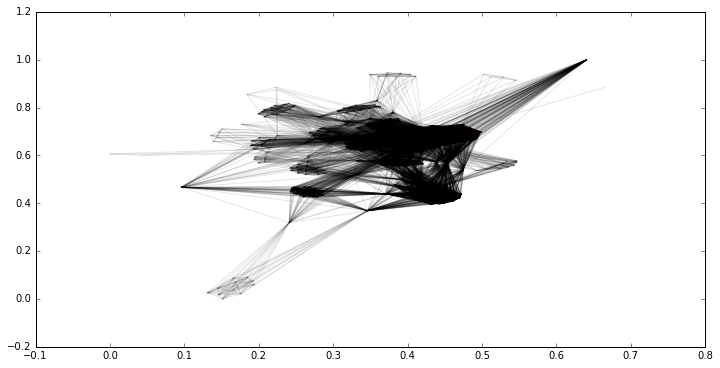

In [85]:
pos_es = nx.spring_layout(nx.projected_graph(GBWes, bottom_nodes_es))

nsize=np.array([v for v in degree_Wes_bottom.values()])
cnt=100
nzize = cnt*(nsize-min(nsize))/(max(nsize)-min(nsize))

nodes = nx.draw_networkx_nodes(nx.projected_graph(GBWes, bottom_nodes_es),pos=pos_es, node_size=nsize, with_labels = True, node_color='r', alpha = 0.5)
edges = nx.draw_networkx_edges(nx.projected_graph(GBWes, bottom_nodes_es), pos=pos_es, alpha = .1, with_labels=True)

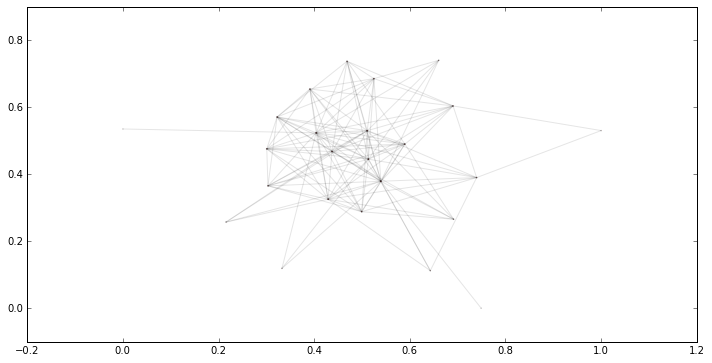

In [86]:
pos_es = nx.spring_layout(nx.projected_graph(GBWes, top_nodes_es))

nsize=np.array([v for v in degree_Wes_top.values()])
cnt=100
nzize = cnt*(nsize-min(nsize))/(max(nsize)-min(nsize))

nodes = nx.draw_networkx_nodes(nx.projected_graph(GBWes, top_nodes_es),pos=pos_es, node_size=nsize, with_labels = True, node_color='r', alpha = 0.5)
edges = nx.draw_networkx_edges(nx.projected_graph(GBWes, top_nodes_es), pos=pos_es, alpha = .1, with_labels=True)

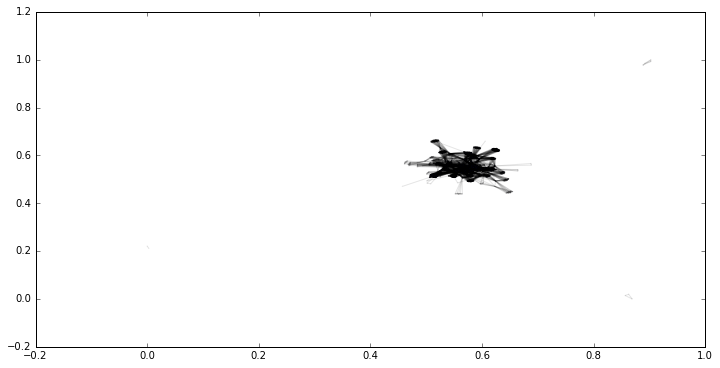

In [87]:
pos_de = nx.spring_layout(nx.projected_graph(GBWde, bottom_nodes_de))

nsize=np.array([v for v in degree_Wde_bottom.values()])
cnt=100
nzize = cnt*(nsize-min(nsize))/(max(nsize)-min(nsize))

nodes = nx.draw_networkx_nodes(nx.projected_graph(GBWde, bottom_nodes_de),pos=pos_de, node_size=nsize, with_labels = True, node_color='b', alpha = 0.5)
edges = nx.draw_networkx_edges(nx.projected_graph(GBWde, bottom_nodes_de), pos=pos_de, alpha = .1, with_labels=True)

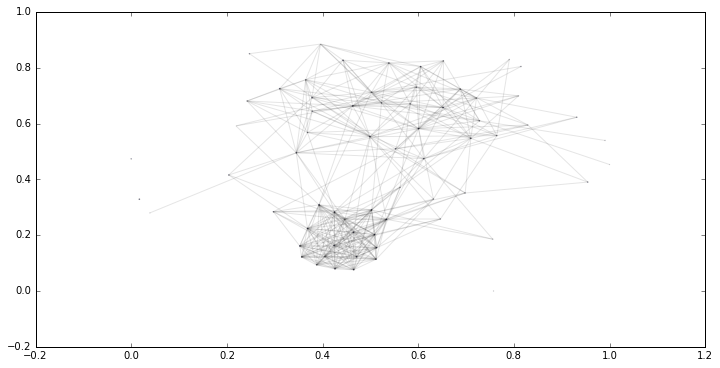

In [88]:
pos_de = nx.spring_layout(nx.projected_graph(GBWde, top_nodes_de))

nsize=np.array([v for v in degree_Wde_top.values()])
cnt=100
nzize = cnt*(nsize-min(nsize))/(max(nsize)-min(nsize))

nodes = nx.draw_networkx_nodes(nx.projected_graph(GBWde, top_nodes_de),pos=pos_de, node_size=nsize, with_labels = True, node_color='b', alpha = 0.5)
edges = nx.draw_networkx_edges(nx.projected_graph(GBWde, top_nodes_de), pos=pos_de, alpha = .1, with_labels=True)

# Graf

En aquest apartat dibuixarem els grafs originals que podem obtenir amb les dades de les wikipedies i com canvia quan hi apliquem algun algoritme per detectar comunitats en sistemes complexos.

In [8]:
import pandas as pd
import networkx as nx
import numpy as np
from networkx import edge_betweenness_centrality as betweenness
import matplotlib.pyplot as plt

WesC=pd.read_csv("WesC_clean.csv",sep=",",header=0,index_col=0,nrows=20000)
#WesC=WesC.sample(1000)
WesC['Article']=WesC['Article']*(-1)
G=nx.from_pandas_dataframe(WesC,source="Autor",target="Article")

def most_central_edge(G):
    centrality = betweenness(G, normalized=True, weight=None)
    return max(centrality, key=centrality.get)

### Wikipedia espanyola

Dibuixem el graf original

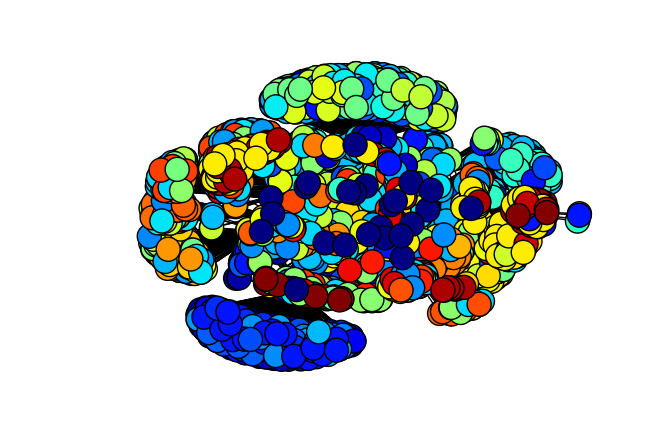

In [10]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

 A continuació apliquem el mètode jèrarquic de Girvan-Newman per a detectar comunitats en sistemes complexos. Es tracta d'un procés iteratiu d'anar tallant els edges amb edge-bet més alta i recalculem el graf.

In [11]:
# Girvan–Newman algorithm
k=0
while k < 25:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 25 talls

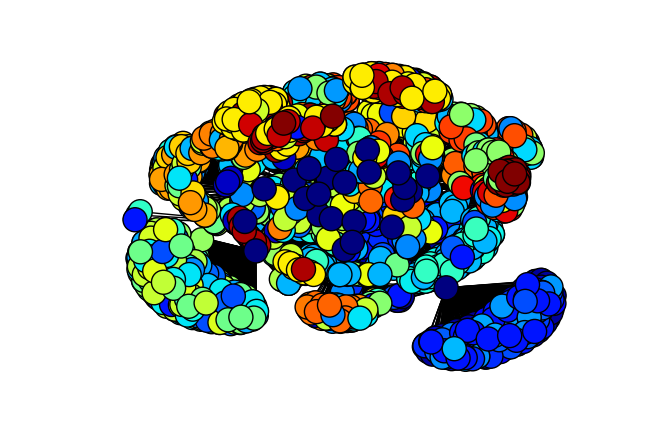

In [12]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [13]:
while k < 50:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 50 talls

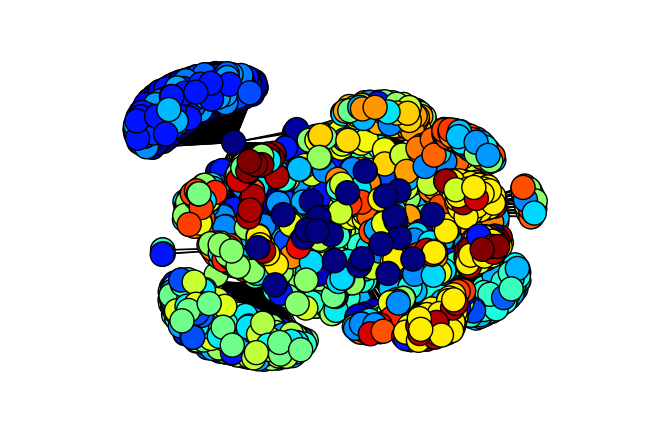

In [14]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [15]:
while k < 75:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 75 talls

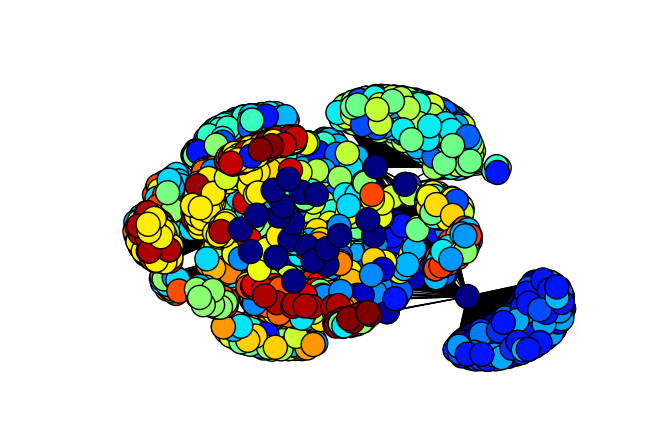

In [16]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [17]:
while k < 100:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 100 talls

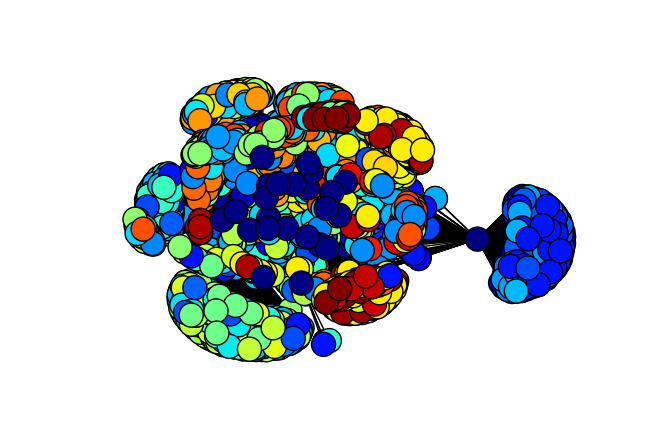

In [18]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [19]:
while k < 125:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 125 talls

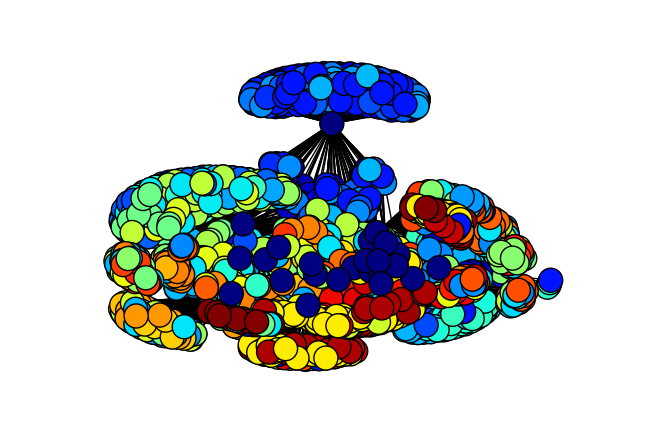

In [20]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [21]:
while k < 150:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 150 talls

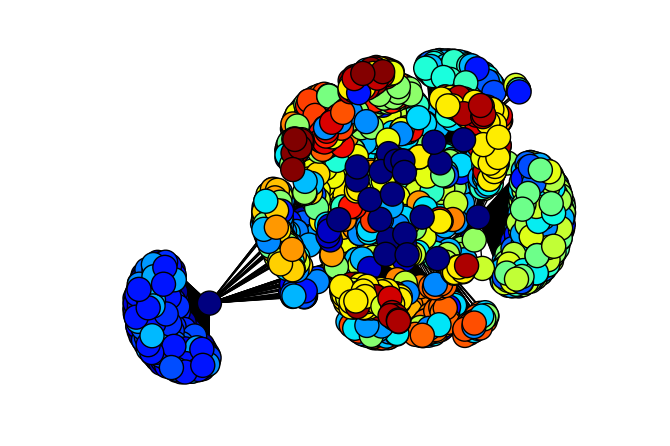

In [22]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [25]:
while k < 175:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 175 talls

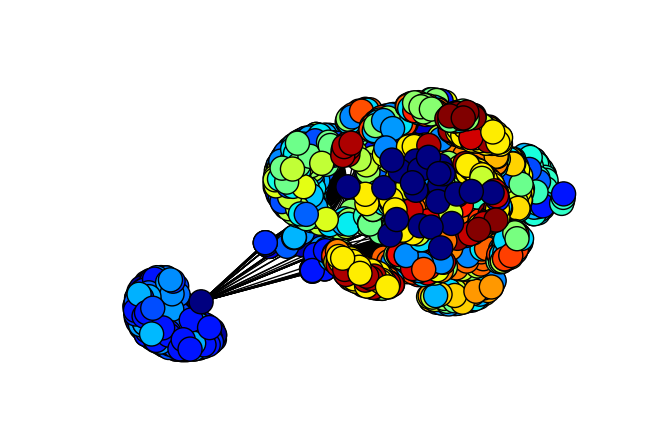

In [26]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [27]:
while k < 200:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 200 talls

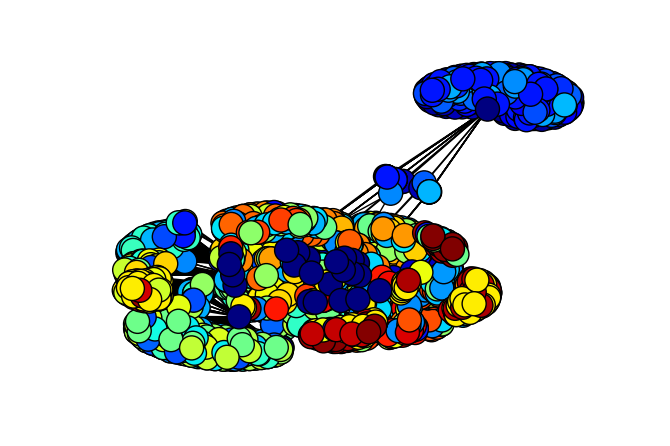

In [28]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [29]:
while k < 250:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 250 talls

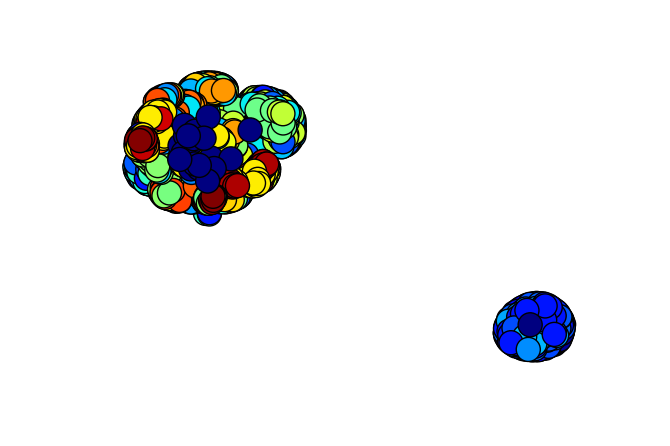

In [30]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [31]:
while k < 350:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 350 talls

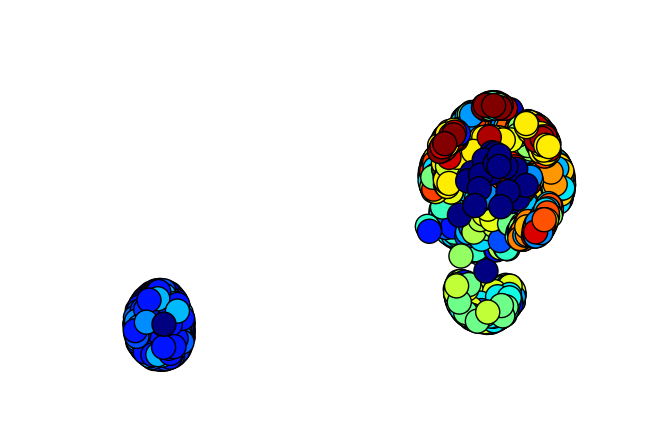

In [32]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [33]:
while k < 500:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 500 talls

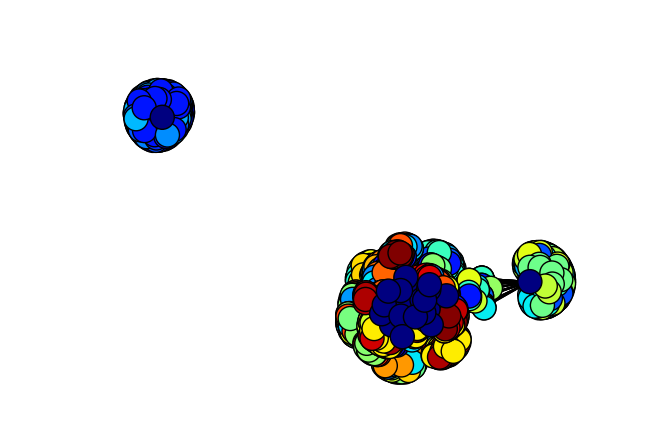

In [34]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [35]:
while k < 1000:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 1000 talls

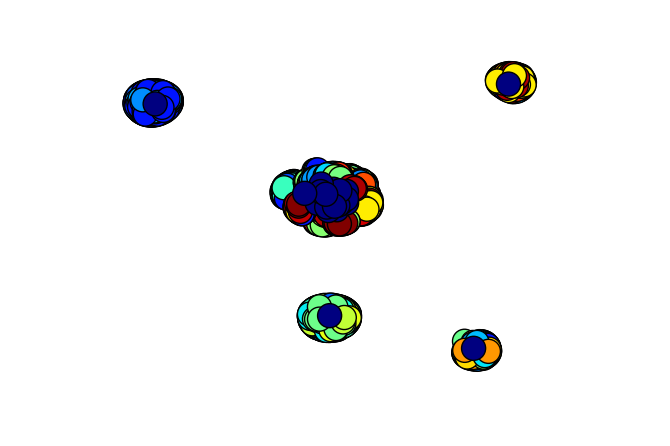

In [36]:
val_map = WesC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

### Wikipedia alemana

In [37]:
WdeC=pd.read_csv("WesC_clean_de.csv",sep=",",header=0,index_col=0,nrows=20000)
#WdeC=WdeC.sample(1000)
WdeC['Article']=WdeC['Article']*(-1)
G=nx.from_pandas_dataframe(WdeC,source="Autor",target="Article")

Dibuixem el graf original

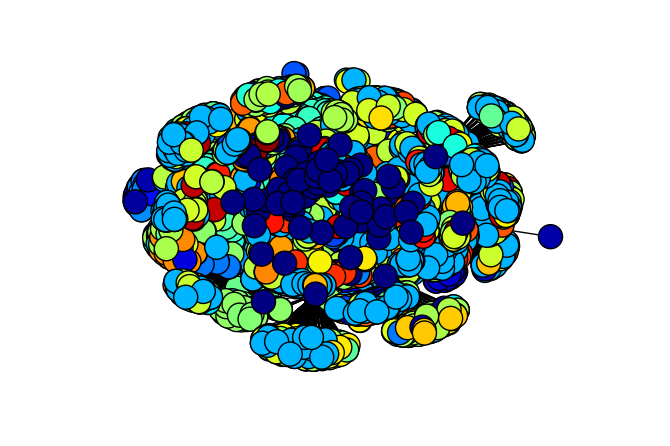

In [38]:
val_map = WdeC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [39]:
# Girvan–Newman algorithm
# Procés iteratiu d'anar tallant els edges amb edge-bet més alta i recalculem el graf
# Tallem 50 edges
k=0
while k < 50:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 50 talls

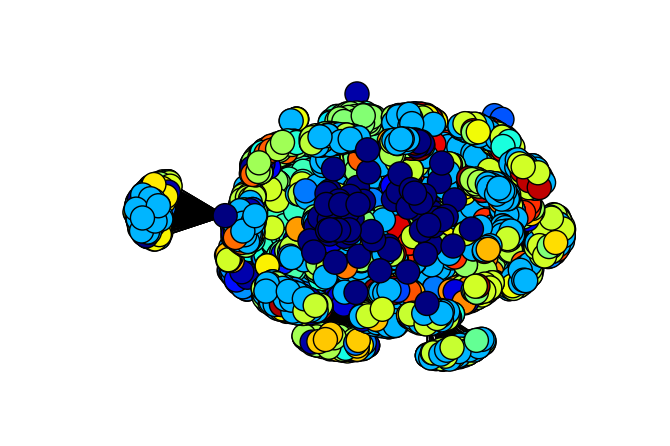

In [40]:
val_map = WdeC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [41]:
while k < 100:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 100 talls

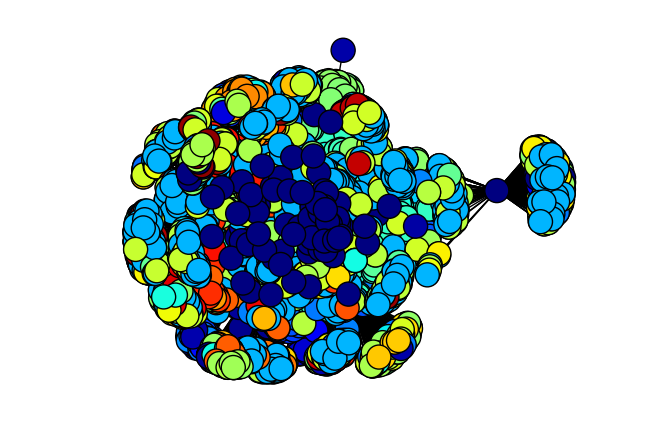

In [42]:
val_map = WdeC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [43]:
while k < 200:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 200 talls

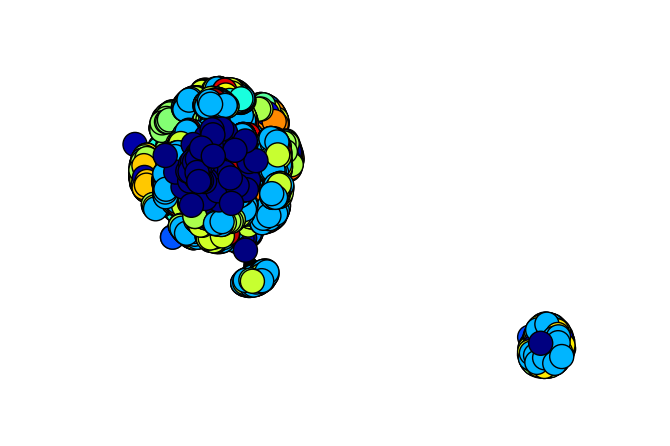

In [44]:
val_map = WdeC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [45]:
while k < 350:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 350 talls

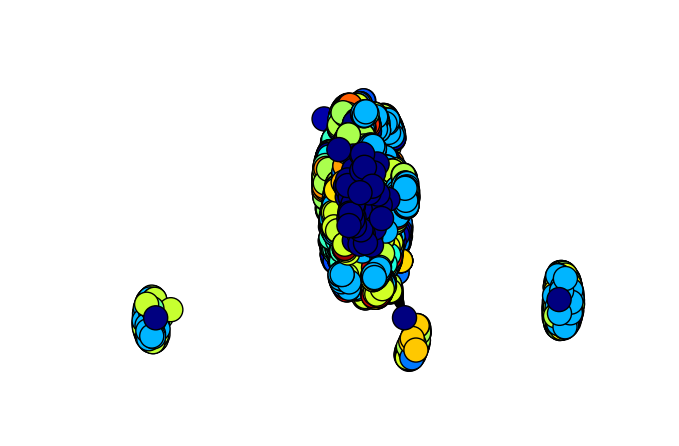

In [46]:
val_map = WdeC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

In [47]:
while k < 500:
    val=most_central_edge(G)
    G.remove_edge(*val)
    k=k+1

Dibuix del graf modificat després de 500 talls

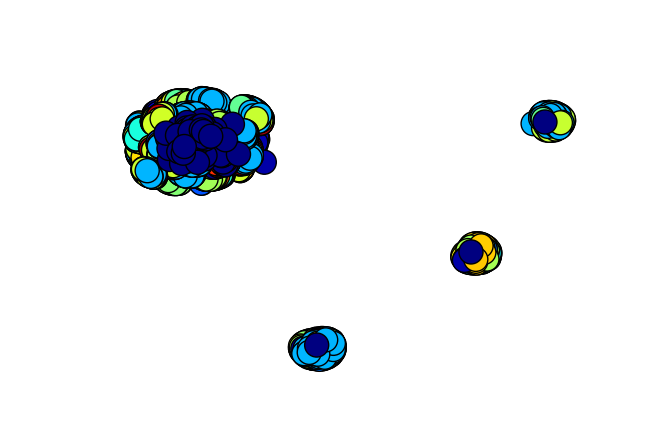

In [48]:
val_map = WdeC['Autor']
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('jet'), node_color=values)
#nx.draw(G,arrows=True,with_labels=False)
plt.show()

Com que la wikipèdia alemana és menys densa que la española, necessitem menys talls per a separar comunitats d'autors